importing matplotlib and seaborn for visualizing and pandas for reading and managing csv file.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **1. Bubble Sort**
**Description:**  
Bubble Sort is a simple comparison-based sorting algorithm that iteratively traverses the array, comparing adjacent elements and swapping them if they are out of order. This process is repeated until the entire array is sorted.

**Time Complexity:**  
- **Best Case:** \(O(n)\) (when the array is already sorted).  
- **Worst Case:** \(O(n^2)\) (when the array is in reverse order).

**Space Complexity:**  
- \(O(1)\) (in-place, no additional memory is required).

---

### **2. Improved Bubble Sort**
**Description:**  
An optimized version of Bubble Sort that introduces a flag (`swapped`) to check if any swaps were made during an iteration. If no swaps are made, the algorithm terminates early, indicating the array is already sorted.

**Time Complexity:**  
- **Best Case:** \(O(n)\) (early termination when the array is sorted).  
- **Worst Case:** \(O(n^2)\).

**Space Complexity:**  
- \(O(1)\) (in-place).

---

### **3. Merge Sort**
**Description:**  
A divide-and-conquer algorithm that splits the array into smaller subarrays until each subarray contains a single element. Then, it merges the subarrays back together in sorted order.

**Time Complexity:**  
- **Best Case:** \(O(n \log n)\).  
- **Worst Case:** \(O(n \log n)\).

**Space Complexity:**  
- \(O(n)\) (requires additional space for the temporary arrays during merging).

---

### **4. Quick Sort**
**Description:**  
A divide-and-conquer algorithm that selects a pivot element, partitions the array such that all elements smaller than the pivot are on the left and all elements larger are on the right, and then recursively sorts the partitions.

**Time Complexity:**  
- **Best Case:** \(O(n \log n)\) (when the pivot divides the array into two equal parts).  
- **Worst Case:** \(O(n^2)\) (when the pivot is the smallest or largest element).

**Space Complexity:**  
- **Best Case:** \(O(\log n)\) (due to recursive stack depth).  
- **Worst Case:** \(O(n)\) (when the partitioning is unbalanced).

---

### **5. Improved Quick Sort**
**Description:**  
An optimized version of Quick Sort that uses tail recursion to minimize the recursive overhead. It also prioritizes sorting smaller subarrays first to further reduce the recursion stack size.

**Time Complexity:**  
- **Best Case:** \(O(n \log n)\).  
- **Worst Case:** \(O(n^2)\).

**Space Complexity:**  
- \(O(\log n)\) (optimized stack usage through tail recursion).

---

### **6. Radix Sort**
**Description:**  
Radix Sort is a non-comparison-based algorithm that sorts integers digit by digit, starting from the least significant digit (LSD) to the most significant digit (MSD), using Counting Sort as a subroutine for sorting each digit.

**Time Complexity:**  
- **Best Case:** \(O(nk)\), where \(k\) is the number of digits in the largest number.  
- **Worst Case:** \(O(nk)\).

**Space Complexity:**  
- \(O(n + k)\) (requires additional space for the counting array and output array).

---

### **7. Selection Sort**
**Description:**  
Selection Sort divides the array into a sorted and unsorted portion. It repeatedly selects the smallest element from the unsorted portion and swaps it with the first unsorted element.

**Time Complexity:**  
- **Best Case:** \(O(n^2)\).  
- **Worst Case:** \(O(n^2)\).

**Space Complexity:**  
- \(O(1)\) (in-place).

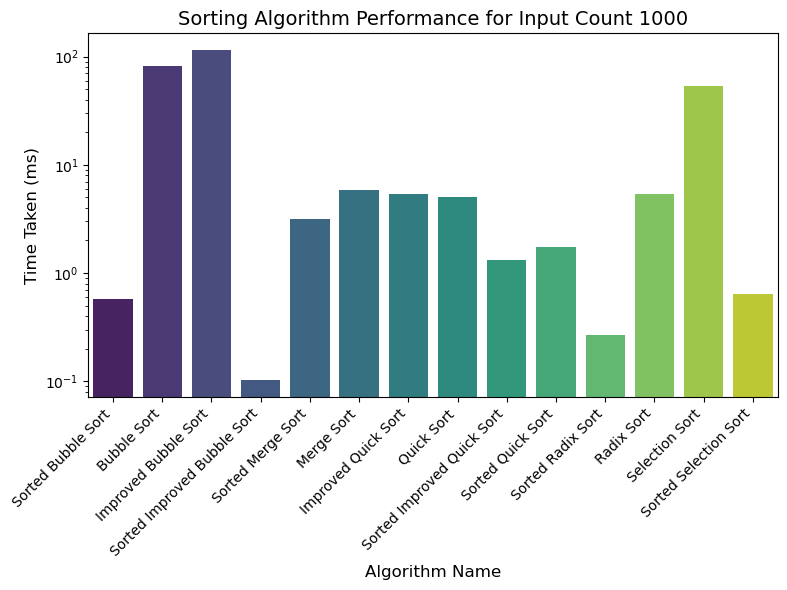

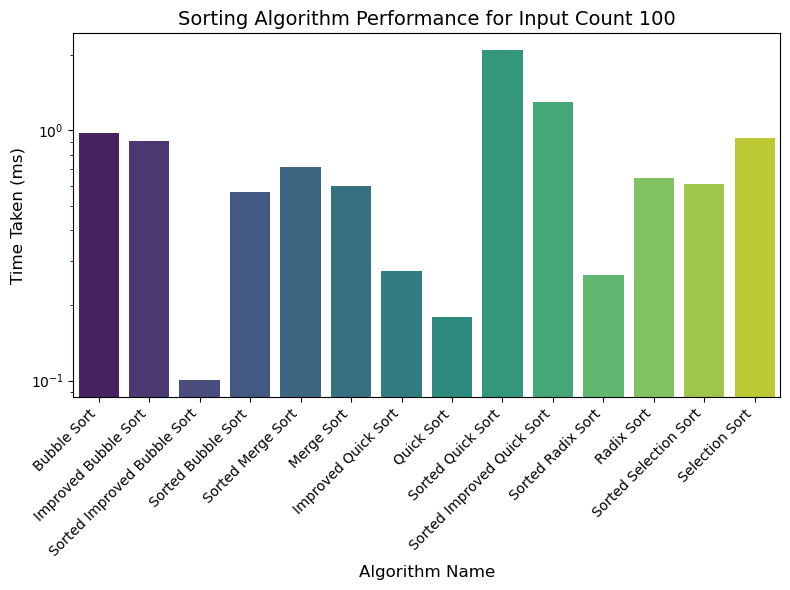

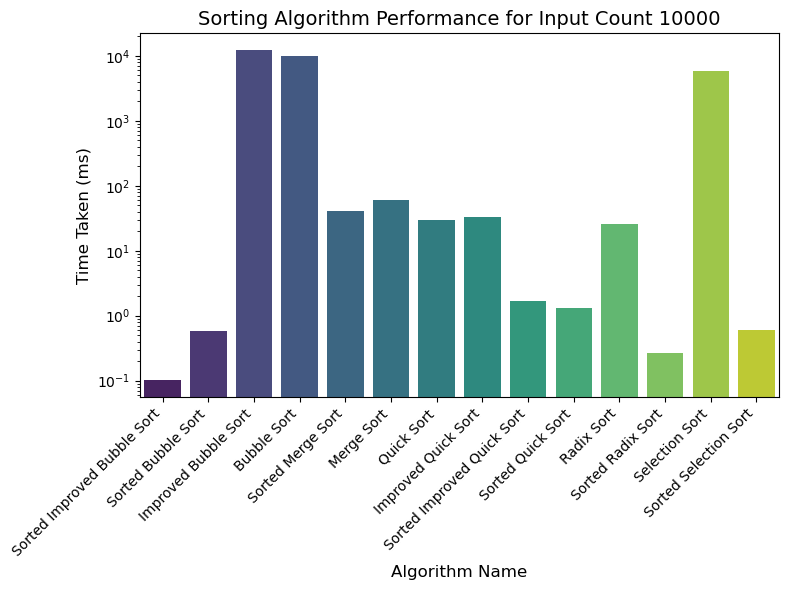

In [2]:
# Read the CSV file
df = pd.read_csv("results.csv")

# Optional: Remove prefix from "Algorithm Name"
def remove_prefix(df, prefix):
    df["Algorithm Name"] = df["Algorithm Name"].str.replace(f"^{prefix}", "", regex=True)
    return df

# Filter rows where Min=1 and Max=1000
if {"Min", "Max"}.issubset(df.columns):
    df = df[(df["Min"] == 1) & (df["Max"] == 1000)]
else:
    print("Columns 'Min' and 'Max' not found. Skipping filtering.")

# Fill NaN in "Algorithm Name" to avoid errors
if "Algorithm Name" in df.columns:
    df["Algorithm Name"] = df["Algorithm Name"].fillna("")

# Extract the last two words from "Algorithm Name" for sorting
df["Last Two Words"] = df["Algorithm Name"].apply(lambda x: ' '.join(x.split()[-2:]) if isinstance(x, str) else "")
df.sort_values(by='Last Two Words', inplace=True)

# Get unique input counts
if "Input Count" in df.columns:
    input_counts = df["Input Count"].unique()
else:
    print("Column 'Input Count' not found.")
    exit()

# Plot results for each input count
for count in input_counts:
    subset = df[df["Input Count"] == count]
    if subset.empty:
        print(f"No data available for Input Count {count}. Skipping.")
        continue

    plt.figure(figsize=(8, 6))

    # Barplot with log scale
    sns.barplot(x='Algorithm Name', y='Time Taken (ms)', data=subset, palette='viridis')
    plt.title(f"Sorting Algorithm Performance for Input Count {count}", fontsize=14)
    plt.xlabel("Algorithm Name", fontsize=12)
    plt.ylabel("Time Taken (ms)", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.yscale('log')  # Apply log scale
    plt.tight_layout()
    plt.show()


### **Report: Sorting Algorithm Performance Analysis**

#### **For Input Count: 100**

1. **Bubble Sort**:
   - For sorted arrays, Bubble Sort performs well as no swaps are needed. The algorithm terminates early, thanks to the improved version's `swapped` flag, which detects that the array is already sorted.

2. **Merge Sort**:
   - Merge Sort does not benefit from a sorted array because it still recursively splits and merges the array. The overhead remains consistent regardless of input order, leading to similar execution times.

3. **Quick Sort**:
   - Sorting an already sorted array increases execution time if a poor pivot selection strategy is used (e.g., always choosing the last element as the pivot). This results in unbalanced partitions, causing performance degradation.

4. **Radix Sort**:
   - Radix Sort processes sorted arrays more efficiently since fewer passes are required to confirm the order. 

5. **Selection Sort**:
   - For sorted arrays, Selection Sort performs slightly faster because it requires no swaps. However, the number of comparisons remains the same, limiting the overall performance improvement.

---

#### **For Input Count: 1000**

1. **Bubble Sort**:
   - For random arrays, the improved Bubble Sort may appear slower than the regular version because of the additional conditional checks (`swapped` flag). These checks add overhead to each iteration, but they help terminate early for sorted inputs, saving time in such cases.

2. **Merge Sort**:
   - Merge Sort maintains consistent execution times due to its recursive nature. It still divides and merges the array even if it is already sorted, leading to similar performance across sorted and random inputs.

3. **Quick Sort**:
   - Quick Sort performs better on sorted arrays if an optimized pivot selection strategy is used (e.g., median-of-three). Otherwise, poor pivot choices can degrade performance due to unbalanced partitions.

4. **Radix Sort**:
   - For sorted arrays, Radix Sort requires fewer passes, improving performance.

5. **Selection Sort**:
   - Selection Sort benefits slightly from sorted arrays due to fewer swaps, but the number of comparisons remains unchanged, limiting the extent of performance improvement.

---

#### **For Input Count: 10,000**

1. **Bubble Sort**:
   - The improved Bubble Sort continues to show its advantages on sorted arrays, as it can terminate early when no swaps are needed. However, the additional checks may increase its runtime on random arrays compared to the regular version.

2. **Merge Sort**:
   - Merge Sort's performance remains consistent, regardless of input order, due to its recursive splitting and merging. It does not inherently detect or exploit sorted inputs.

3. **Quick Sort**:
   - On larger inputs, Quick Sort's performance heavily depends on the pivot selection strategy. For sorted arrays, a poor pivot choice can lead to significant slowdowns, while a balanced strategy ensures efficient execution.

4. **Radix Sort**:
   - The difference between regular and improved Radix Sort becomes more noticeable at this scale. 

5. **Selection Sort**:
   - Selection Sort's performance for sorted arrays improves slightly due to reduced swaps, but the \(O(n^2)\) comparison overhead remains, making it inefficient for larger input sizes.

---

### **Key Observations:**
- **Bubble Sort** is highly sensitive to input order, with its improved version excelling on sorted arrays but incurring extra overhead on random inputs.
- **Merge Sort** shows consistent performance across input sizes but does not take advantage of sorted inputs.
- **Quick Sort** requires careful pivot selection to perform efficiently, especially for sorted arrays.
- **Radix Sort** demonstrates significant improvement on sorted arrays.
- **Selection Sort** benefits slightly from sorted arrays but remains inefficient for large datasets due to its \(O(n^2)\) complexity.


C:\Users\ng822\AppData\Local\Temp\ipykernel_30276\1294050181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_df["Sorted"] = 1
C:\Users\ng822\AppData\Local\Temp\ipykernel_30276\1294050181.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  improved_df['Improved'] = 1


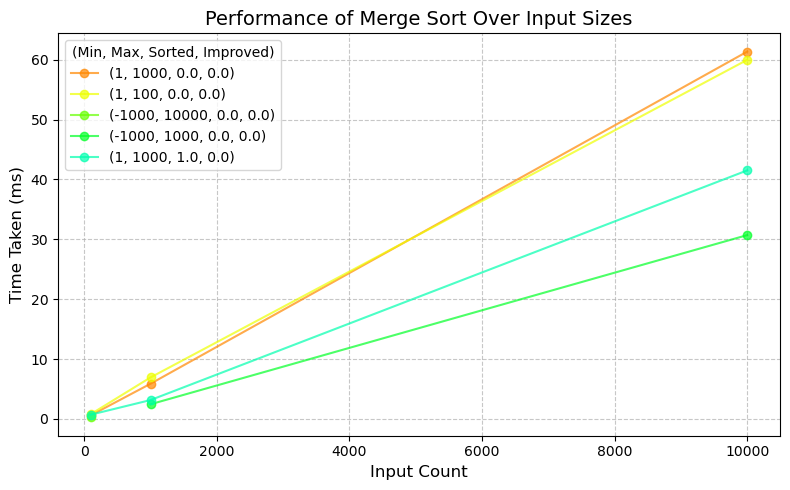

In [3]:
# Load data from CSV
df = pd.read_csv("results.csv")

# Filter out algorithms whose names start with "Sorted"
sorted_df = df[df["Algorithm Name"].str.startswith("Sorted ", na=False)]
sorted_df["Sorted"] = 1
df = df[~df["Algorithm Name"].str.startswith("Sorted", na=False)]
df = pd.concat([df, sorted_df])
df = remove_prefix(df, "Sorted ")

# Handle "Improved" algorithms
improved_df = df[df["Algorithm Name"].str.startswith("Improved ", na=False)]
improved_df['Improved'] = 1
df = df[~df["Algorithm Name"].str.startswith("Improved", na=False)]

# Strip "Improved" prefix from algorithm names
improved_df["Algorithm Name"] = improved_df["Algorithm Name"].str.lstrip("Improved ")

# Combine filtered and improved data
df = pd.concat([df, improved_df])

# Fill missing values with 0
df = df.fillna(0)


df = remove_prefix(df, "Improved ")

# Create a new column for the input range group (Min, Max, Sorted, Improved)
df["Range Group"] = df.apply(lambda row: f"({row['Min']}, {row['Max']}, {row['Sorted']}, {row['Improved']})", axis=1)

# Unique algorithm names
algorithms = df["Algorithm Name"].unique()

# Unique range groups
range_groups = df["Range Group"].unique()

# Create color palette for range groups with more distinct colors
color_palette = sns.color_palette("hsv", len(range_groups))
range_colors = {range_group: color_palette[i] for i, range_group in enumerate(range_groups)}

# Define a special, darker color for "Improved" algorithms
improved_color = sns.color_palette("dark", as_cmap=True)[1]
# Plot performance trends for each algorithm, colored by range group
algorithm=algorithms[0]
    # Extract data for the current algorithm
subset = df[df["Algorithm Name"] == algorithm]

    # Create the plot
plt.figure(figsize=(8, 5))
for range_group in subset["Range Group"].unique():
    range_subset = subset[subset["Range Group"] == range_group]
    if not range_subset.empty:
        min_val = range_subset["Min"].iloc[0]
        max_val = range_subset["Max"].iloc[0]
        sorted_val = range_subset["Sorted"].iloc[0]
        improved_val = range_subset["Improved"].iloc[0]
        
        color = range_colors[range_group] if not algorithm.startswith("Improved") else improved_color
        marker = 'o' if not algorithm.startswith("Improved") else 's'

        plt.plot(
            range_subset["Input Count"], 
            range_subset["Time Taken (ms)"], 
            marker=marker, 
            label=range_group,
            color=color,
            alpha=0.7  # Adjust opacity for clarity
        )

    # Customize the plot
plt.title(f"Performance of {algorithm} Over Input Sizes", fontsize=14)
plt.xlabel("Input Count", fontsize=12)
plt.ylabel("Time Taken (ms)", fontsize=12)
plt.legend(title="(Min, Max, Sorted, Improved)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



- **MergeSort**:
  - Efficiently splits and merges arrays into sorted subarrays.
  - Performs well with sorted data as less computation is required.
  - Struggles when the pigeonhole principle is in effect (i.e., input range is less than the number of distinct inputs), causing performance degradation.
  - When handling negative values, the performance does not change significantly.
  - As the value range extends, MergeSort exhibits improved performance since fewer splits and merges are necessary.



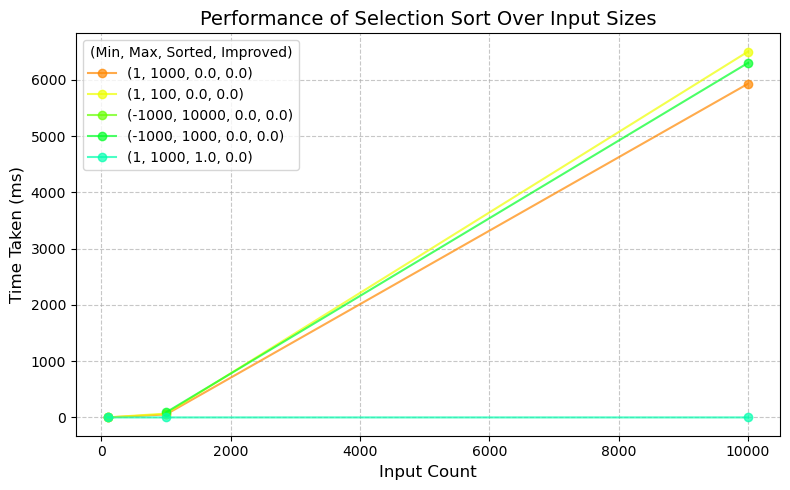

In [4]:
# Plot performance trends for each algorithm, colored by range group
algorithm=algorithms[1]
    # Extract data for the current algorithm
subset = df[df["Algorithm Name"] == algorithm]

    # Create the plot
plt.figure(figsize=(8, 5))
for range_group in subset["Range Group"].unique():
    range_subset = subset[subset["Range Group"] == range_group]
    if not range_subset.empty:
        min_val = range_subset["Min"].iloc[0]
        max_val = range_subset["Max"].iloc[0]
        sorted_val = range_subset["Sorted"].iloc[0]
        improved_val = range_subset["Improved"].iloc[0]
        
        color = range_colors[range_group] if not algorithm.startswith("Improved") else improved_color
        marker = 'o' if not algorithm.startswith("Improved") else 's'

        plt.plot(
            range_subset["Input Count"], 
            range_subset["Time Taken (ms)"], 
            marker=marker, 
            label=range_group,
            color=color,
            alpha=0.7  # Adjust opacity for clarity
        )

    # Customize the plot
plt.title(f"Performance of {algorithm} Over Input Sizes", fontsize=14)
plt.xlabel("Input Count", fontsize=12)
plt.ylabel("Time Taken (ms)", fontsize=12)
plt.legend(title="(Min, Max, Sorted, Improved)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



 
- **Selection Sort**:  
  - Performs well on sorted arrays as the time complexity remains consistent regardless of input size.
  - Struggles when the pigeonhole principle is in effect, where the input range is less than the number of distinct inputs, causing performance degradation.
  - When handling negative values, while the performance does not change significantly, some additional overhead is experienced compared to positive-only inputs.


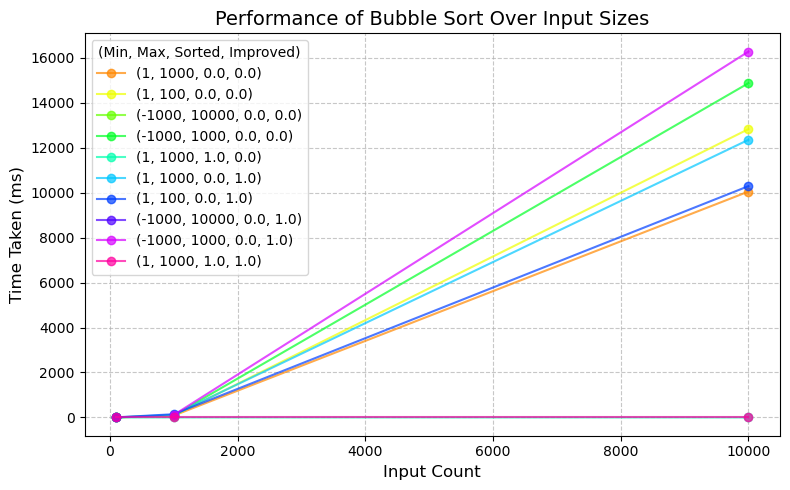

In [5]:

algorithm=algorithms[2]
    # Extract data for the current algorithm
subset = df[df["Algorithm Name"] == algorithm]

    # Create the plot
plt.figure(figsize=(8, 5))
for range_group in subset["Range Group"].unique():
    range_subset = subset[subset["Range Group"] == range_group]
    if not range_subset.empty:
        min_val = range_subset["Min"].iloc[0]
        max_val = range_subset["Max"].iloc[0]
        sorted_val = range_subset["Sorted"].iloc[0]
        improved_val = range_subset["Improved"].iloc[0]
        
        color = range_colors[range_group] if not algorithm.startswith("Improved") else improved_color
        marker = 'o' if not algorithm.startswith("Improved") else 's'

        plt.plot(
            range_subset["Input Count"], 
            range_subset["Time Taken (ms)"], 
            marker=marker, 
            label=range_group,
            color=color,
            alpha=0.7  # Adjust opacity for clarity
        )

    # Customize the plot
plt.title(f"Performance of {algorithm} Over Input Sizes", fontsize=14)
plt.xlabel("Input Count", fontsize=12)
plt.ylabel("Time Taken (ms)", fontsize=12)
plt.legend(title="(Min, Max, Sorted, Improved)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Bubble Sort : 
  - Performs well on sorted arrays as the time complexity remains consistent regardless of input size.
  - Struggles when the pigeonhole principle is in effect, where the input range is less than the number of distinct inputs, causing performance degradation.
  - When handling negative values, while the performance does not change significantly, some additional overhead is experienced compared to positive-only inputs.
  -improved performance can be worse than normal.
  - having negative numbers decreseases performance significantly.

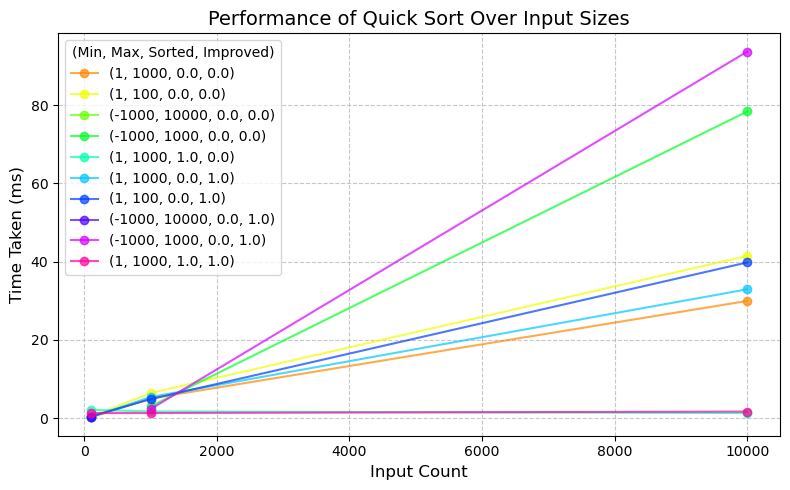

In [6]:

algorithm=algorithms[3]
    # Extract data for the current algorithm
subset = df[df["Algorithm Name"] == algorithm]

    # Create the plot
plt.figure(figsize=(8, 5))
for range_group in subset["Range Group"].unique():
    range_subset = subset[subset["Range Group"] == range_group]
    if not range_subset.empty:
        min_val = range_subset["Min"].iloc[0]
        max_val = range_subset["Max"].iloc[0]
        sorted_val = range_subset["Sorted"].iloc[0]
        improved_val = range_subset["Improved"].iloc[0]
        
        color = range_colors[range_group] if not algorithm.startswith("Improved") else improved_color
        marker = 'o' if not algorithm.startswith("Improved") else 's'

        plt.plot(
            range_subset["Input Count"], 
            range_subset["Time Taken (ms)"], 
            marker=marker, 
            label=range_group,
            color=color,
            alpha=0.7  # Adjust opacity for clarity
        )

    # Customize the plot
plt.title(f"Performance of {algorithm} Over Input Sizes", fontsize=14)
plt.xlabel("Input Count", fontsize=12)
plt.ylabel("Time Taken (ms)", fontsize=12)
plt.legend(title="(Min, Max, Sorted, Improved)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



- **Quick Sort**:  
  - Performs well on sorted arrays as the time complexity remains consistent regardless of input size.
  - Does not struggle significantly when the pigeonhole principle is in effect.
  - When handling negative values, performance drops due to the increased number of recursive calls and unbalanced partitions.


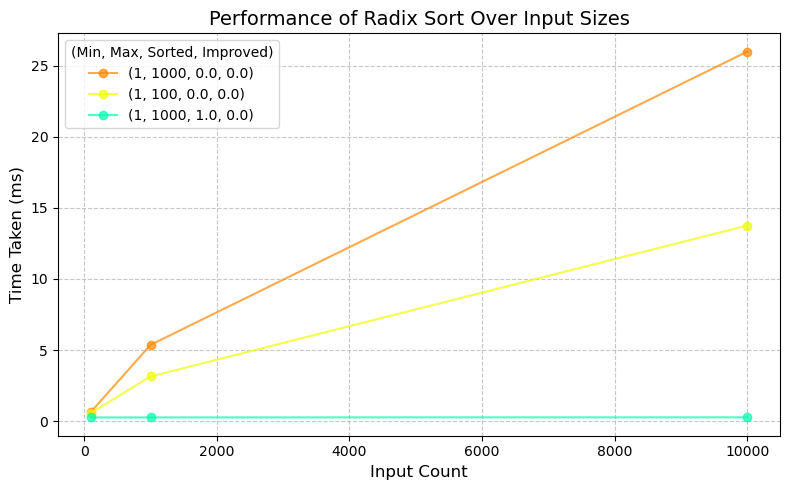

In [7]:
algorithm=algorithms[4]
    # Extract data for the current algorithm
subset = df[df["Algorithm Name"] == algorithm]

    # Create the plot
plt.figure(figsize=(8, 5))
for range_group in subset["Range Group"].unique():
    range_subset = subset[subset["Range Group"] == range_group]
    if not range_subset.empty:
        min_val = range_subset["Min"].iloc[0]
        max_val = range_subset["Max"].iloc[0]
        sorted_val = range_subset["Sorted"].iloc[0]
        improved_val = range_subset["Improved"].iloc[0]
        
        color = range_colors[range_group] if not algorithm.startswith("Improved") else improved_color
        marker = 'o' if not algorithm.startswith("Improved") else 's'

        plt.plot(
            range_subset["Input Count"], 
            range_subset["Time Taken (ms)"], 
            marker=marker, 
            label=range_group,
            color=color,
            alpha=0.7  # Adjust opacity for clarity
        )

    # Customize the plot
plt.title(f"Performance of {algorithm} Over Input Sizes", fontsize=14)
plt.xlabel("Input Count", fontsize=12)
plt.ylabel("Time Taken (ms)", fontsize=12)
plt.legend(title="(Min, Max, Sorted, Improved)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



- **Radix Sort**:  
  - Performs well on sorted arrays as the time complexity remains consistent regardless of input size.
  - Works more efficiently in lower ranges since it processes digits independently, which reduces unnecessary operations for larger values.
  - Struggles slightly when dealing with larger value ranges, as the number of digits increases, leading to more passes over the data.


In [13]:
from SortAlgorithms import SortAlgorithms
import time
merge_2sec = SortAlgorithms(size=350000, value_range=(1, 1000)) 
bubble_2sec = SortAlgorithms(size=4800, value_range=(1, 1000)) 
selection_2sec = SortAlgorithms(size=6000, value_range=(1, 1000)) 
quick_2sec = SortAlgorithms(size=200000, value_range=(1, 1000))  
radix_2sec = SortAlgorithms(size=650000, value_range=(1, 1000))

In [14]:
start_time = time.perf_counter()
merge_2sec.mergeSort()
print('Merge Sort:', time.perf_counter() - start_time)
merge_2sec.resetArray()

start_time = time.perf_counter()
selection_2sec.selectionSort()
print('Selection Sort:', time.perf_counter() - start_time)

start_time = time.perf_counter()
bubble_2sec.bubbleSort()
print('Bubble Sort:', time.perf_counter() - start_time)


start_time = time.perf_counter()
quick_2sec.quickSort()
print('Quick Sort:', time.perf_counter() - start_time)


start_time = time.perf_counter()
radix_2sec.radixSort()
print('Radix Sort:', time.perf_counter() - start_time)





Merge Sort: 1.792005100287497
Selection Sort: 1.7328834999352694
Bubble Sort: 1.927102499641478
Quick Sort: 1.7041157996281981
Radix Sort: 1.7593101002275944


Using 350,000 for Merge Sort, 4,800 for Bubble Sort, 6,000 for Selection Sort, 200,000 for Quick Sort, and 650,000 for Radix Sort provides some of the largest input sizes that can be processed within a 2-second timeframe. However, due to factors such as algorithm complexity, input variability, and system performance, these values may vary slightly when running the same code on different systems or with different datasets.